## Машинное обучение - 1
### 1. Решение задач кластеризации, классификации и регрессии с применением библиотек Python: scipy, numpy, pandas, matplotlib, sklearn. (повторение, на примерах из бизнеса).  


### 1.1 Вспоминаем pandas

In [1]:
# Импортируем библиотеки
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette('tab20')

#### 1.1.1 Тип данных Series

Series (Серия) - одномерный массив с индексом

In [2]:
# Создадим объект s1 типа Series и выведем его на экран
s1 = pd.Series([2, 15, 10, 20])
s1

0     2
1    15
2    10
3    20
dtype: int64

In [3]:
# К элементам можно обратиться по индексу. Выведем элементы с индексом 2 и 3
s1[[2, 3]]

2    10
3    20
dtype: int64

In [4]:
# Можно создать Series, явно указав индексы (например, строковые или datetime).
s2 = pd.Series([3, 14, 15, 92, 65], index = ['First', 'Second', 'Third', 'Fourth', 'Fifth'])
# По этим индексам также можно обращаться к элементам Series
s2[['Second', 'Fifth']]

Second    14
Fifth     65
dtype: int64

In [5]:
# Зададим индексы типа datetime
s3 = pd.Series(['Mon', 'Tue', 'Wed'], index = pd.date_range(start='2019-02-11', periods=3))
# По индексам типа datetime также можно получить соответствующие значения серии
s3[[pd.datetime(2019,2,11), pd.datetime(2019,2,13)]]

2019-02-11    Mon
2019-02-13    Wed
dtype: object

In [6]:
# Выведем все индексы серии. Видим объект соответствующего типа (DatetimeIndex)
s3.index

DatetimeIndex(['2019-02-11', '2019-02-12', '2019-02-13'], dtype='datetime64[ns]', freq='D')

In [7]:
# Series, как вектора,  можно складывать, вычитать, умножать на число и т.п.
# Создадим 2 объекта типа Series с 1000 элементами стандартного нормального распределения
np.random.seed(2019)
x1 = pd.Series(np.random.randn(1000))
x2 = pd.Series(np.random.randn(1000))

In [8]:
# Создадим новый объект Series, каждый элемент которого является
# суммой соответствующих элементов 2-х других серий
y1 = x1 + x2
# Убедимся, что получилась серия
type(y1)

pandas.core.series.Series

In [9]:
# Если операция, которую мы хотим выполнить над серией не векторная,
# приходится выполнять её над каждым элементом по отдельности.
# Получившийся список преобразовываем в Series
import math
y2 = pd.Series([math.sin(2*x) for x in x1])
type(y2)

pandas.core.series.Series

In [10]:
# Умножим все элементы исходных серий на числа и сложим получившиеся серии.
# В результате также получается серия.
y3 = 3*y2 + x2/2
type(y3)

pandas.core.series.Series

In [11]:
# У серии можно посмотреть описательные статистики, такие как среднее, медиана, стандартное отклонение и т.п.
# Сводную информацию можно получить с помощью метода describe()
y1.describe()

count    1000.000000
mean       -0.043961
std         1.423792
min        -4.377193
25%        -0.993238
50%        -0.069981
75%         0.918398
max         4.059889
dtype: float64

In [12]:
# Можно посмотреть отдельно, например, среднее значение
y1.mean()

-0.04396119378355154

In [13]:
# Стандартное отклонение и т.д.
y1.std()

1.423792182527045

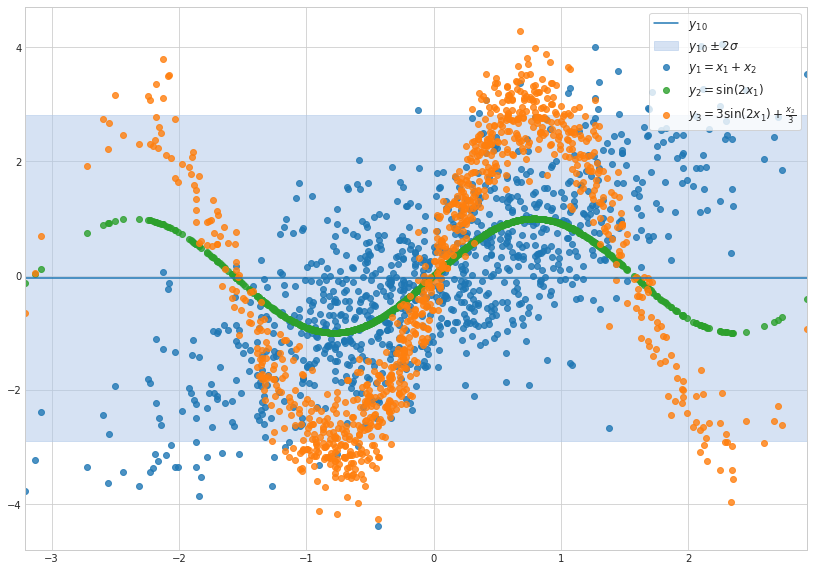

In [14]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (14, 10)
# Отобразим среднее и стандартное отклонение для серии y1
plt.fill_between([x1.min(), x1.max()],
                 y1.mean() - 2*y1.std(),
                 y1.mean() + 2*y1.std(),
                 color=color[1], alpha=0.5, label=r'${{y}_{1}}_{0}\pm2\sigma$');
plt.axhline(y=y1.mean(), color=color[0], label=r'${{y}_{1}}_{0}$');
# Отобразим получившиеся серии y1, y2, y3
plt.scatter(x=x1, y=y1, c=[color[0]], label=r'$y_1 = x_1 + x_2$', alpha=0.8);
plt.scatter(x=x1, y=y2, c=[color[4]], label=r'$y_2 = \sin (2x_1)$', alpha=0.8);
plt.scatter(x=x1, y=y3, c=[color[2]], label=r'$y_3 = 3\sin(2x_1) + \frac{x_2}{3}$', alpha=0.8);
plt.margins(x=0);
plt.legend(fontsize=12, frameon=True);

#### 1.1.2 Тип данных DataFrame
DataFrame - двумерный массив, состоящий из одного или более объектов Series, связанных по меткам индекса. Каждый объект Series (столбец) может иметь имя.  

Загрузим набор данных **ausautoBI8999** из пакета CASdatasets: Insurance datasets (http://cas.uqam.ca/).  
Это данные о 22036 случаях страховых выплат в связи с травмами, произошедшими в Австралии в период с июля 1989 года по январь 1999 года. Описание столбцов:  
  *  **AccDate, ReportDate, FinDate** - Дата аварии, отчетная дата, дата завершения. День всегда устанавливается в первый день месяца.
  *  **AccMth, ReportMth, FinMth** - Месяц аварии, отчетный месяц, последний месяц: 1 = июль 1989 года ..., 120 = июнь 1999 года).
  *  **OpTime** - Операционное время.
  *  **InjType1, InjType2, InjType3, InjType4, InjType5** - Код травмы.
  *  **InjNb** - Количество пострадавших.
  *  **Legal** - Имеет ли страхователь юридическое представительство.
  *  **AggClaim** - Совокупная сумма.

from google.colab import drive
drive.mount('/content/drive')

In [15]:
# Загрузим данные
# Чтобы этот пример заработал у вас в Гугл колабе, необходимо данные ausautoBI8999.csv 
# разместить в корневом каталоге на гугл колабе в папке Data

dfAusAuto = pd.read_csv('ausautoBI8999.csv', low_memory=False)

# к данным можно подключаться и через SQL
# Убедимся, что получили объект типа DataFrame
type(dfAusAuto)

pandas.core.frame.DataFrame

In [16]:
# Выведем первые 10 строк
dfAusAuto.head(10)

,AccDate,ReportDate,FinDate,AccMth,ReportMth,FinMth,OpTime,InjType1,InjType2,InjType3,InjType4,InjType5,InjNb,Legal,AggClaim
0,1993-08-01,1993-09-01,1993-10-01,50,51,52,0.1,minor injury,NaN,NaN,NaN,NaN,1,No,87.75
1,1993-12-01,1994-01-01,1994-02-01,54,55,56,0.1,minor injury,NaN,NaN,NaN,NaN,1,No,353.62
2,1994-01-01,1994-01-01,1994-02-01,55,55,56,0.1,minor injury,NaN,NaN,NaN,NaN,1,No,688.83
3,1994-04-01,1994-04-01,1994-05-01,58,58,59,0.1,minor injury,NaN,NaN,NaN,NaN,1,No,172.80
4,1994-08-01,1994-09-01,1994-09-01,62,63,63,0.1,minor injury,NaN,NaN,NaN,NaN,1,No,43.29
5,1994-12-01,1995-01-01,1995-01-01,66,67,67,0.1,fatal injury,NaN,NaN,NaN,NaN,1,No,2915.43
6,1995-02-01,1995-02-01,1995-03-01,68,68,69,0.1,minor injury,small injury,minor injury,NaN,NaN,3,No,496.16
7,1995-05-01,1995-05-01,1995-07-01,71,71,73,0.1,minor injury,minor injury,minor injury,small injury,NaN,4,No,1593.20
8,1995-08-01,1995-08-01,1995-09-01,74,74,75,0.1,minor injury,minor injury,NaN,NaN,NaN,2,No,122.87
9,1995-11-01,1995-11-01,1995-12-01,77,77,78,0.1,minor injury,NaN,NaN,NaN,NaN,1,No,1943.10


In [17]:
# Мы можем отсортировать вывод DataFrame с помощью sort_values()
# Посмотрим на 10 строк с максимальной суммой "AggClaim" (т.е. отсортируем по убыванию, ascending=False)
# Обратите внимание, что результат сортировки не сохраняется в исходном объекте DataFrame
# Для того, чтобы отсортировать DataFrame с сохранением результата в том же объекте,
# используется атрибут inplace: DF.sort_values(by=['ColumnName'], inplace=True).
dfAusAuto.sort_values(by=['AggClaim'], ascending=False).head(10).head(2).T

,18869,17976
AccDate,1995-04-01,1994-12-01
ReportDate,1995-05-01,1995-01-01
FinDate,1998-10-01,1998-03-01
AccMth,70,66
ReportMth,71,67
FinMth,112,105
OpTime,79.5,75.7
InjType1,fatal injury,severe injury
InjType2,NaN,NaN
InjType3,NaN,NaN


In [18]:
# Выведем названия всех столбцов
dfAusAuto.columns

Index(['AccDate', 'ReportDate', 'FinDate', 'AccMth', 'ReportMth', 'FinMth',
       'OpTime', 'InjType1', 'InjType2', 'InjType3', 'InjType4', 'InjType5',
       'InjNb', 'Legal', 'AggClaim'],
      dtype='object')

In [19]:
# Можно также вывести индексы
dfAusAuto.index

RangeIndex(start=0, stop=22036, step=1)

In [20]:
# Другой вариант получения первых n строк: DataFrame[:n]
# Аналогично, последние n строк DataFrame[-n:] (либо с помощью метода tail())
# Выведем последние 3 строки
dfAusAuto[-3:]

,AccDate,ReportDate,FinDate,AccMth,ReportMth,FinMth,OpTime,InjType1,InjType2,InjType3,InjType4,InjType5,InjNb,Legal,AggClaim
22033,1990-08-01,1993-12-01,1999-02-01,14,54,116,98.9,minor injury,NaN,NaN,NaN,NaN,1,Yes,127141.44
22034,1989-11-01,1993-07-01,1999-02-01,5,49,116,99.0,medium injury,NaN,NaN,NaN,NaN,1,No,194911.81
22035,1989-10-01,1993-08-01,1999-01-01,4,50,115,99.1,minor injury,NaN,NaN,NaN,NaN,1,Yes,117562.73


In [21]:
# Можно получить последовательность строк, например с 1000-й по 1004-ю
dfAusAuto[1000:1005]

,AccDate,ReportDate,FinDate,AccMth,ReportMth,FinMth,OpTime,InjType1,InjType2,InjType3,InjType4,InjType5,InjNb,Legal,AggClaim
1000,1996-09-01,1996-10-01,1997-03-01,87,88,93,4.2,minor injury,NaN,NaN,NaN,NaN,1,Yes,7904.23
1001,1996-10-01,1996-11-01,1997-04-01,88,89,94,4.2,minor injury,minor injury,NaN,NaN,NaN,2,No,3375.90
1002,1997-02-01,1997-03-01,1997-08-01,92,93,98,4.2,minor injury,minor injury,NaN,NaN,NaN,2,No,23647.33
1003,1997-06-01,1997-06-01,1997-12-01,96,96,102,4.2,minor injury,minor injury,minor injury,minor injury,NaN,4,No,3517.50
1004,1997-09-01,1997-10-01,1998-03-01,99,100,105,4.2,minor injury,minor injury,minor injury,NaN,NaN,3,No,5813.93


In [22]:
# Также можно выбрать набор столбцов
# Выведем первые 3 строки столбцов AccDate и AccMth
dfAusAuto[['AccDate', 'AccMth']][:3]

,AccDate,AccMth
0,1993-08-01,50
1,1993-12-01,54
2,1994-01-01,55


In [23]:
# Для того, чтобы вывести строки по меткам индексов и столбцы по именам, воспользуемся loc
# Выведем строки с метками индекса с 20 по 22 (как и в Series метки индекса могут быть,
# например, строками, или датами); и столбцы с именами InjNb и AggClaim
dfAusAuto.loc[20:22, ['InjNb', 'AggClaim']].head(1)

,InjNb,AggClaim
20,1,30.0


In [24]:
# Для того, чтобы получить строки и столбцы по номерам, используем iloc
# Выведем строки с 30-й по 34-ю и столбцы с 7-го по 12-й (нумерация начинается с 0)
dfAusAuto.iloc[30:35, 7:13]

,InjType1,InjType2,InjType3,InjType4,InjType5,InjNb
30,minor injury,minor injury,minor injury,minor injury,minor injury,5
31,minor injury,NaN,NaN,NaN,NaN,1
32,minor injury,NaN,NaN,NaN,NaN,1
33,minor injury,NaN,NaN,NaN,NaN,1
34,minor injury,minor injury,NaN,NaN,NaN,2


In [25]:
# Можно выбрать только те строки, значения столбцов в которых удовлетворяют определённым условиям
# Выберем строки, количество пострадавших в которых больше 3-х,
# и посчитаем среднюю сумму (AggClaim) по этим строкам
dfAusAuto[dfAusAuto['InjNb'] > 3]['AggClaim'].mean()

57502.32249634681

#### 1.1.3 Подготовка данных для моделирования. Очистка данных. Работа с пропущенными значениями.

In [26]:
# Посмотрим, какие типы сейчас у столбцов
dfAusAuto.dtypes

AccDate        object
ReportDate     object
FinDate        object
AccMth          int64
ReportMth       int64
FinMth          int64
OpTime        float64
InjType1       object
InjType2       object
InjType3       object
InjType4       object
InjType5       object
InjNb           int64
Legal          object
AggClaim      float64
dtype: object

In [27]:
# Более информативен метод info(). Кроме типов каждого столбца (и общей информации по типам в DataFrame),
# мы видим количество присутствующих значений в каждом столбце, а также объём используемой памяти.
dfAusAuto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22036 entries, 0 to 22035
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AccDate     22036 non-null  object 
 1   ReportDate  22036 non-null  object 
 2   FinDate     22036 non-null  object 
 3   AccMth      22036 non-null  int64  
 4   ReportMth   22036 non-null  int64  
 5   FinMth      22036 non-null  int64  
 6   OpTime      22036 non-null  float64
 7   InjType1    22036 non-null  object 
 8   InjType2    11438 non-null  object 
 9   InjType3    7138 non-null   object 
 10  InjType4    4107 non-null   object 
 11  InjType5    2310 non-null   object 
 12  InjNb       22036 non-null  int64  
 13  Legal       22036 non-null  object 
 14  AggClaim    22036 non-null  float64
dtypes: float64(2), int64(4), object(9)
memory usage: 2.5+ MB


In [28]:
# Столбцы AccDate, ReportDate, FinDate сейчас имеют строковый тип
# Для корректной работы с ними преобразуем datetime
# Используем apply, чтобы применить функцию pd.to_datetime к соответствующим столбцам.
col_to_date = ['AccDate', 'ReportDate', 'FinDate']
dfAusAuto[col_to_date] = dfAusAuto[col_to_date].apply(pd.to_datetime, format='%Y-%m-%d')

In [29]:
# Столбец Legal также строковый
# Посмотрим количество уникальных значений (и, заодно, их распределение в процентах)
round(dfAusAuto.Legal.value_counts(normalize=True)*100, 2)

Yes    63.66
No     36.34
Name: Legal, dtype: float64

In [30]:
# Уникальных значений 2, заменим Yes на 1, а No на 0
# Один из вариантов такого преобразования - замена по условию в цикле по всем элементам столбца
# dfAusAuto.Legal = [1 if l=='Yes' else 0 for l in dfAusAuto.Legal]
# Другой вариант - замена по словарю с помощью map()
dictLegal = {'Yes': 1, 'No': 0}
dfAusAuto.Legal = dfAusAuto.Legal.map(dictLegal)

In [31]:
# Можем убедиться, что всё сделали правильно, повторив вывод распределения значений
round(dfAusAuto.Legal.value_counts(normalize=True)*100, 2)

1    63.66
0    36.34
Name: Legal, dtype: float64

In [32]:
# Выведем количество уникальных значений для всех столбцов.
dfAusAuto.nunique().sort_values()

Legal             2
InjNb             5
InjType4          6
InjType5          6
InjType1          7
InjType2          7
InjType3          7
FinDate          69
FinMth           69
ReportDate       73
ReportMth        73
AccDate         115
AccMth          115
OpTime          991
AggClaim      20171
dtype: int64

In [33]:
# Для лучшего представления о данных, было бы неплохо видеть количество уникальных
# значений вместе с типом данных.
# Для этого создадим 2 DataFrame, с количеством уникальных значений и с типом каждого столбца.
# Полученные DataFrame склеим по индексу (имя столбца) с помощью pd.concat
# Результат отсортируем по количеству уникальных значений
pd.concat([pd.DataFrame({'Unique Values': dfAusAuto.nunique()}),
           pd.DataFrame({'Type': dfAusAuto.dtypes})], axis=1, sort=False).sort_values(by='Unique Values')

,Unique Values,Type
Legal,2,int64
InjNb,5,int64
InjType4,6,object
InjType5,6,object
InjType1,7,object
InjType2,7,object
InjType3,7,object
FinDate,69,datetime64[ns]
FinMth,69,int64
ReportDate,73,datetime64[ns]


In [34]:
# Можем обратить внимание, что количество уникальных значений одинаково для
# столбцов FinDate и FinMth, ReportDate и ReportMth, AccDate и AccMth соответственно
# Это соответствует описанию расчёта столбцов FinMth, ReportMth, AccMth
# Они получаются из даты так, что 1 = июль 1989 года ..., 120 = июнь 1999 года.
# Проверим, что ошибок в вычислениях нет, это также относится к этапу очистки данных.
# Для проверки посчитаем разницу между результатом (год*12 + месяц-6) и месяцом из соответствующих столбцов.
# Видим, что ошибок в вычислениях нет.
# В результате мы могли бы удалить столбцы с датой, но они могут быть полезны для более простого
# конструирования таких признаков, как время года, если это потребуется
col_date = ['AccDate', 'ReportDate', 'FinDate']
col_date_mth = ['AccMth', 'ReportMth', 'FinMth']
for cdate, cmonth in zip(col_date, col_date_mth):
    print('Столбец {} имеет {} некорректных значений'.
          format(cmonth,
                 str(sum([((ddate.year-1989)*12+(ddate.month-6))-dmonth
                          for ddate, dmonth in zip(dfAusAuto[cdate],
                                                   dfAusAuto[cmonth])]))))

Столбец AccMth имеет 0 некорректных значений
Столбец ReportMth имеет 0 некорректных значений
Столбец FinMth имеет 0 некорректных значений


In [35]:
# Подобную проверку имеет смыл провести для столбца InjNb (количество пострадавших)
# Его значение должно быть равно сумме столбцов InjType1-5, имеющих значение
# Для проверки будем использовать сумму всех пропущенных значений isna().
# Для того, чтобы суммировать не по столбцам, а по строкам, используем sum(axis=1)
col_inj = ['InjType1', 'InjType2', 'InjType3', 'InjType4', 'InjType5']
print('Столбец InjNb имеет {} некорректных значений'.
      format(str(((5 - dfAusAuto[col_inj].isna().sum(axis=1)) - dfAusAuto.InjNb).sum())))

Столбец InjNb имеет 0 некорректных значений


Теперь мы можем заполнить пропущенные значения в столбцах InjType1-5.  
Вариант обработки пропущенных значений зависит от причины их отсутствия, а также от природы данных.
Можно выделить несколько вариантов:  
  *  Удаление строк, содержащих хотя бы одно пропущенное значение (например, если остальные данные в строке яволяются несущественными для текущей задачи)  
  `DataFrame.dropna(how='any', axis=1)`
  *  Замена на константу. Для выбора константы требуется понимание природы данных.  
  `DataFrame.Temperature.fillna(36.6)`
  *  Замена на медиану, среднее значение и т.п. Для корректной замены имеет смысл учитывать зависимость от остальных данных, если эта зависимость существенна  
  `DataFrame.fillna(DataFrame.median())`

In [36]:
# В данном случае, пропущенные значения не являются результатом неполноты данных,
# ошибки в исходных данных или в структуре.
# Пропущенные значения соответствуют природе данных (нет пострадавшего - нет тяжести травмы)
# Посмотрим, какие значения может принимть тяжесть травмы для всех пострадавших
dfAusAuto[col_inj].apply(pd.Series.value_counts).sort_values(by='InjType1', ascending=False)

,InjType1,InjType2,InjType3,InjType4,InjType5
minor injury,15638,9433,6092,3558.0,1972.0
small injury,3376,1451,740,385.0,181.0
not recorded,1256,92,109,78.0,108.0
medium injury,1133,396,172,80.0,38.0
fatal injury,256,12,4,3.0,NaN
high injury,189,30,12,3.0,5.0
severe injury,188,24,9,NaN,6.0


In [37]:
# Мы могли бы заполнить пропущенные значения похожим по смыслу "not recorded",
# но смысл "пострадал с неизвестной степеью тяжести" и "не пострадал" все таки отличается.
# Заполним пропуски значением "no".
# Для того, чтобы сделать преобразование в нашем текщем объекте, используем inplace=True
dfAusAuto.fillna('no', inplace=True)

In [38]:
# Выведем ещё раз получившееся распределение тяжести травм пострадавших
dfAusAuto[col_inj].apply(pd.Series.value_counts).sort_values(by='InjType1', ascending=False).fillna(0)

,InjType1,InjType2,InjType3,InjType4,InjType5
minor injury,15638.0,9433,6092,3558.0,1972.0
small injury,3376.0,1451,740,385.0,181.0
not recorded,1256.0,92,109,78.0,108.0
medium injury,1133.0,396,172,80.0,38.0
fatal injury,256.0,12,4,3.0,0.0
high injury,189.0,30,12,3.0,5.0
severe injury,188.0,24,9,0.0,6.0
no,0.0,10598,14898,17929.0,19726.0


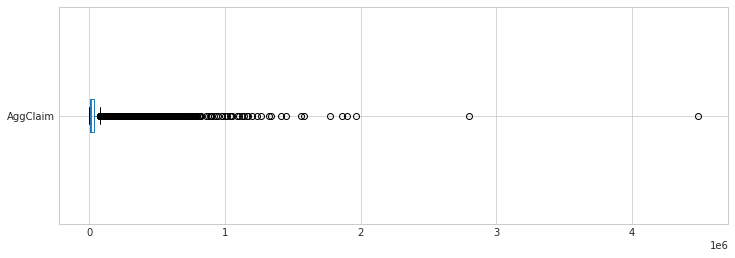

In [39]:
# К этапу очистки данных также относится выявление выбросов,
# и аномалий в распределениях (всплески и спады, не согласующиеся с природой данных)
# Посмотрим на распределение AggClaim с помощью графиков boxplot и hist
plt.rcParams['figure.figsize'] = (12, 4)
dfAusAuto.AggClaim.plot.box(vert=False);

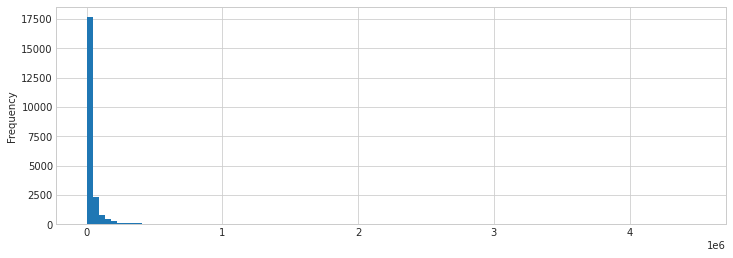

In [40]:
dfAusAuto.AggClaim.plot.hist(bins=100);

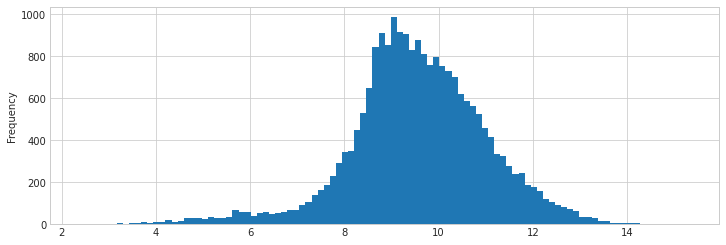

In [41]:
# Видим, что преобладают значения, близкие к нулю и есть длинный "хвост" справа.
# Возможно, лучше будет работать с логарифмом
pd.Series(np.log1p(dfAusAuto.AggClaim)).plot.hist(bins=100);

#### 1.1.4 Описательные статистики

In [42]:
# Можно посмотреть описательные статистики (min, max, mean и т.д.)с помощью метода describe()
dfAusAuto.describe()

,AccMth,ReportMth,FinMth,OpTime,InjNb,Legal,AggClaim
count,22036.000000,22036.000000,22036.000000,22036.000000,22036.00000,22036.000000,2.203600e+04
mean,62.046106,71.334952,88.370212,46.331648,2.13419,0.636595,3.836722e+04
std,25.890351,17.723639,19.556888,27.125661,1.36726,0.480991,9.098111e+04
min,1.000000,15.000000,49.000000,0.100000,1.00000,0.000000,9.960000e+00
25%,44.000000,54.000000,72.000000,23.000000,1.00000,0.000000,6.296972e+03
50%,64.000000,69.000000,91.000000,45.900000,2.00000,1.000000,1.385387e+04
75%,82.000000,85.000000,106.000000,69.300000,3.00000,1.000000,3.512342e+04
max,115.000000,116.000000,117.000000,99.100000,5.00000,1.000000,4.485797e+06


In [43]:
# По умолчанию включает только столбцы с числовыми типами данных.
# Выведем данные по тем же столбцам, явно указывая тип.
# Если столбцов много, удобнее выводить в транспонированном виде.
dfAusAuto.describe(include=['int64', 'float64']).T

,count,mean,std,min,25%,50%,75%,max
AccMth,22036.0,62.046106,25.890351,1.00,44.0000,64.000,82.000,115.00
ReportMth,22036.0,71.334952,17.723639,15.00,54.0000,69.000,85.000,116.00
FinMth,22036.0,88.370212,19.556888,49.00,72.0000,91.000,106.000,117.00
OpTime,22036.0,46.331648,27.125661,0.10,23.0000,45.900,69.300,99.10
InjNb,22036.0,2.134190,1.367260,1.00,1.0000,2.000,3.000,5.00
Legal,22036.0,0.636595,0.480991,0.00,0.0000,1.000,1.000,1.00
AggClaim,22036.0,38367.215533,90981.108533,9.96,6296.9725,13853.865,35123.415,4485797.21


In [44]:
# Для категориальных признаков считаются другие статистики (top, freq), поэтому удобнее выводить
# их не вместе (include='all'), а по отдельности
dfAusAuto.describe(include=['object']).T

,count,unique,top,freq
InjType1,22036,7,minor injury,15638
InjType2,22036,8,no,10598
InjType3,22036,8,no,14898
InjType4,22036,7,no,17929
InjType5,22036,7,no,19726


#### 1.1.5 Базовые элементы визуализации  
С помощью метода plot() объектов DataFrame и Series мы вызываем функцию plot() библиотеки matplotlib.  
Рассмотрим несколько основных видов графиков.

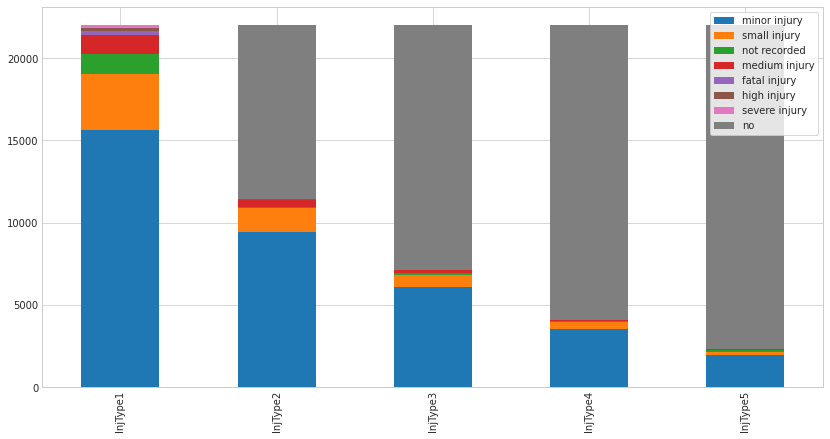

In [45]:
# Мы уже строили графики boxplot ("ящик с усами") и hist (гистограмму).
# Построим столбчатый график с накоплением для сделанной выше
# таблицы распределения тяжести травм у пострадавших.
plt.rcParams['figure.figsize'] = (14, 7)
dfAusAuto[col_inj].apply(pd.Series.value_counts).\
sort_values(by='InjType1', ascending=False).fillna(0).T.\
plot.bar(stacked=True);
plt.legend(frameon=True);

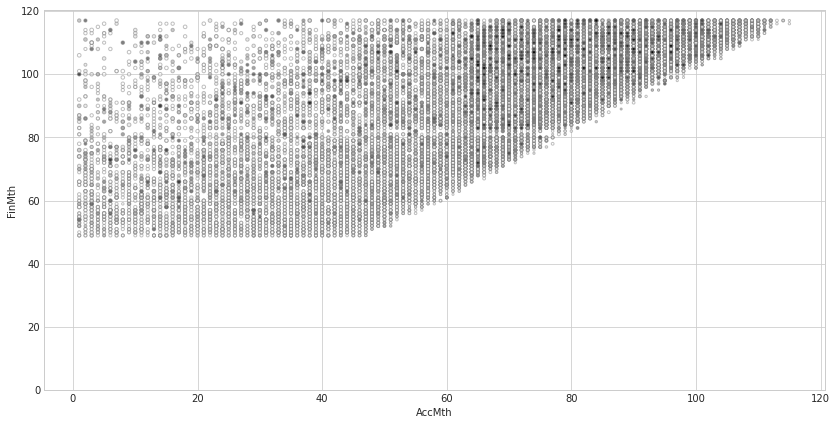

In [46]:
# Посмотрим scatter plot (диаграмму рассеяния) зависимости месяца завершения от месяца аварии
# Цветом отметим количество пострадавших, а размером - логарифм суммы.
dfAusAuto[['AccMth', 'FinMth']].plot.scatter(x='AccMth', y='FinMth',
                                             alpha=0.5, edgecolor='gray',
                                             s=np.log1p(dfAusAuto.AggClaim),
                                             c=dfAusAuto.InjNb);
plt.yticks(range(0, 140, 20));